In [1]:
# The ultimate target feature: time from one stop to another

# Imports
import pandas as pd
import numpy as np
from datetime import date, datetime
from patsy import dmatrices
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_graphviz, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz 
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from statsmodels.formula.api import ols

# Read csv file into a dataframe.
df = pd.read_csv('csv_data/bus_route4_clean.csv')

# 1.0 Model Analysis

## 1.1 Random Forest Regression

In [100]:
y, X = dmatrices('journey_time ~  speed + stop_order + DayOfWeek + HourOfDay + MinsOfHour + RDS_Event + Journey_Pattern_ID', df, return_type="dataframe") 
y = np.ravel(y)
X

,Intercept,speed,stop_order,DayOfWeek,HourOfDay,MinsOfHour,RDS_Event,Journey_Pattern_ID
0,1.0,1.965385e+08,13.0,1.0,9.0,17.0,0.0,40001.0
1,1.0,2.157000e+08,10.0,1.0,10.0,24.0,0.0,40001.0
2,1.0,1.126154e+08,26.0,1.0,11.0,55.0,0.0,40001.0
3,1.0,1.405000e+08,24.0,1.0,13.0,2.0,0.0,40001.0
4,1.0,1.174815e+08,27.0,1.0,13.0,58.0,0.0,40001.0
5,1.0,1.357273e+08,22.0,1.0,15.0,5.0,0.0,40001.0
6,1.0,1.763889e+08,18.0,1.0,16.0,2.0,0.0,40001.0
7,1.0,1.671053e+08,19.0,1.0,16.0,59.0,0.0,40001.0
8,1.0,1.682000e+08,20.0,1.0,19.0,2.0,0.0,40001.0
9,1.0,1.465263e+08,19.0,1.0,19.0,56.0,0.0,40001.0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=33) 

In [102]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [103]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=10))

In [104]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [105]:
clf = GridSearchCV(pipeline, hyperparameters, cv=8)

In [106]:
clf.fit(X_train, y_train)

GridSearchCV(cv=8, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1], 'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [107]:
pred = clf.predict(X_test)

In [108]:
r2_score(y_test, pred)

0.91349889419249741

Good, closer to 1 the better

In [109]:
mean_squared_error(y_test, pred)

19.92270588235294

Good, closer to 0 the better.

This saves the model for later.

In [89]:
joblib.dump(clf, '../flask_app/static/rf_regressor.pkl')

['../flask_app/static/rf_regressor.pkl']

In [53]:
X_test.head()

,Intercept,speed,stop_order,DayOfWeek,HourOfDay,MinsOfHour,Temperature,Humidity,Precipitation
288,1.0,1.252414e+08,29.0,0.0,13.0,40.0,5.8,82.0,0.0
1078,1.0,1.326316e+08,38.0,4.0,17.0,55.0,7.9,85.0,3.4
582,1.0,1.216500e+08,40.0,0.0,8.0,53.0,4.1,89.0,0.0
32,1.0,1.477000e+08,20.0,2.0,10.0,46.0,5.8,82.0,0.0
961,1.0,1.464000e+08,30.0,1.0,18.0,48.0,0.8,97.0,0.0


This can then be reloaded to be used in the flask app. As seen below.

In [14]:
clf2 = joblib.load('../flask_app/static/rf_regressor.pkl')

In [15]:
clf2.predict(X_test)

array([  1.20596719e+08,   6.79499742e+07,   1.34511601e+08,
         7.02802441e+07,   6.57203716e+07,   3.74720289e+07,
         1.69801660e+08,   7.86637005e+07,   1.11152355e+08,
         8.03136788e+07,   1.63250339e+08,   4.68348180e+07,
         5.12873188e+07,   8.72525012e+07,   3.14053622e+07,
         7.42086208e+07,   1.11152355e+08,   6.42479253e+07,
         8.97747843e+07,   1.22484987e+08,   1.36399869e+08,
         6.14571131e+07,   7.94318799e+07,   1.61362072e+08,
         7.39365195e+07,   1.00514913e+08,   3.46526924e+07,
         1.15080351e+08,   1.20596719e+08,   1.69801660e+08,
         1.20596719e+08,   1.63250339e+08,   1.22484987e+08,
         4.63894081e+07,   9.59941732e+07,   1.20596719e+08,
         1.08954502e+08,   6.22953965e+07,   4.04206402e+07,
         1.22484987e+08,   1.22484987e+08,   9.67176070e+07,
         1.63250339e+08,   1.22484987e+08,   1.48769575e+08,
         1.63250339e+08,   1.17709372e+08,   1.22484987e+08,
         9.50301672e+07,

In [16]:
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)

In [17]:
df.shape

(1271, 40)

## To Do

Date is in the model as a variable making significant impact as cannot group random forest by dates - to confirm why it makes an impact (improves score about 7% but we should  understand is this equiv to groupby or coincidence or a proxy for events).

Getting a memory error with feature importance so for now using the linear results to guide - issue with rain: clearly important - we know that - and humidity is important, but no rain columns are making any impact. See commented out code below.

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [19]:
pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})

,feature,importance
0,Intercept,0.000000
1,speed,0.382726
2,DayOfWeek,0.132528
3,HourOfDay,0.190786
4,MinsOfHour,0.293961


In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

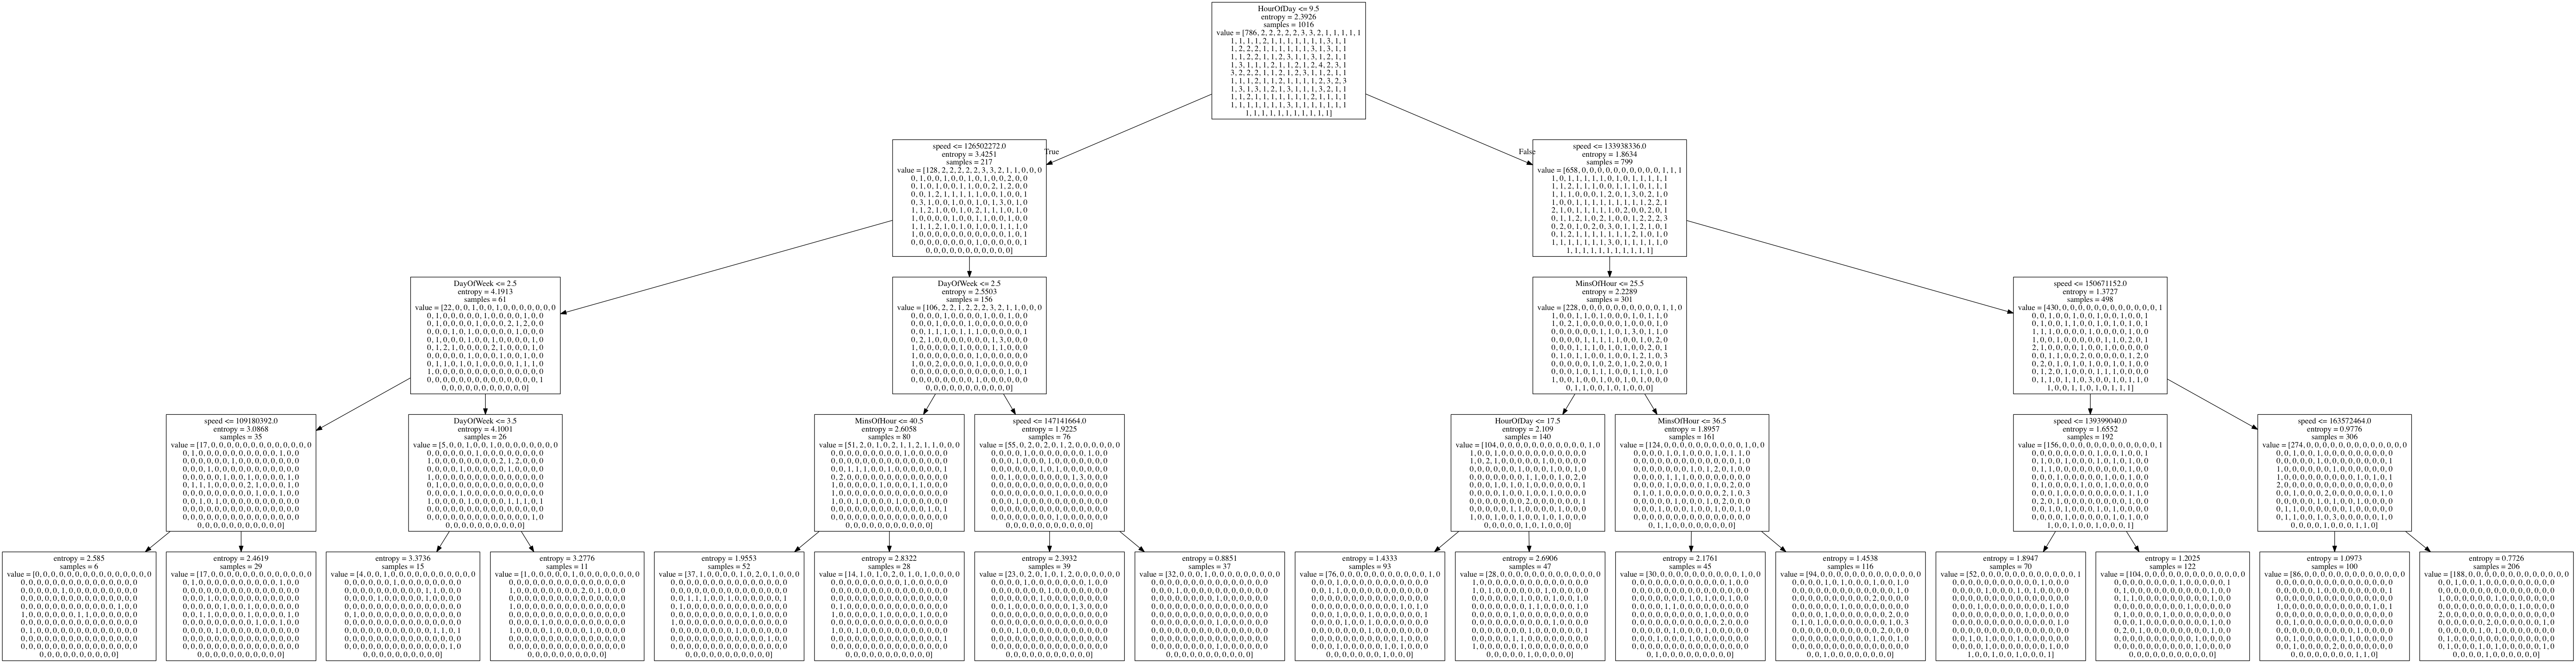

In [21]:
tree.export_graphviz(clf, out_file='tree.dot', feature_names = X_train.columns)
!dot -Tpng tree.dot > tree.png
from IPython.display import Image 
Image(filename='tree.png')